In [1]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

print(__doc__)

#filename = get_testdata_files('CT_small.dcm')[0]
filename = "brains/ID_0a96a5b9b.dcm"
dataset = pydicom.dcmread(filename)
# print("File: "+filename)
# # Normal mode:
# print()
# print("Filename.........:", filename)
# #print("Storage type.....:", dataset.SOPClassUID)
# print()

# pat_name = dataset.PatientName
# display_name = pat_name.family_name + ", " + pat_name.given_name
# print("Patient's name...:", display_name)
# print("Patient id.......:", dataset.PatientID)
# print("Modality.........:", dataset.Modality)
# print("Study Date.......:", dataset.StudyDate)

# if 'PixelData' in dataset:
#     rows = int(dataset.Rows)
#     cols = int(dataset.Columns)
#     print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
#         rows=rows, cols=cols, size=len(dataset.PixelData)))
#     if 'PixelSpacing' in dataset:
#         print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
# print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
# plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
# plt.show()
print(dataset.pixel_array)

Automatically created module for IPython interactive environment


FileNotFoundError: [Errno 2] No such file or directory: 'brains/ID_0a96a5b9b.dcm'

Move stage_2_train.csv into an array with 3 columns: one for ID, one for type of hemorrhage, and one for diagnosis.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
import torch
import glob

In [6]:
def prep_dataframe(directory, csv):   
    diagnoses = pd.read_csv(csv)
    diagnoses = diagnoses.to_numpy()
    more = np.empty((len(diagnoses), 3), dtype = 'U18')
    for x in range(len(diagnoses)):
        more[x][0] = diagnoses[x][0][3:12]
        more[x][1] = diagnoses[x][0][13:]

    more[:,2] = diagnoses[:,1]

    #test_list = os.listdir(directory)
    test_list = glob.glob("/Users/brookskennedy/Desktop/stage_2_train/*.dcm")
    #print(test_list)
    image_arrays = np.zeros([512, 512])
    df = pd.DataFrame(columns = ["Image", "ID", "Diagnoses", "Hemmorhage"])

    for file in test_list:
        if(file != ".DS_Store"):
            try:
                dataset = pydicom.dcmread(file, force = True)
                diagnoses = more[:,1:][more[:,0]==file[44:53]]
                filtered_diagnoses = diagnoses[:,0][diagnoses[:,1]=='1']
                any_diagnosis = filtered_diagnoses.size != 0
                df = df.append({"Image": dataset.pixel_array, "ID": file[44:53], 
                                "Diagnoses": filtered_diagnoses, 
                               "Hemmorhage": any_diagnosis}, ignore_index = True)
            except:
                print("Error with file "+file)  
    return df

In [7]:
train_data_ = prep_dataframe("/Users/brookskennedy/Desktop/stage_2_train", "/Users/brookskennedy/Desktop/rsna/stage_2_train.csv")

#f = prep_dataframe("/home/wustl/brooks.kennedy/stage_2_train", "/home/wustl/brooks.kennedy/stage_2_train.csv")

In [ ]:
#def prep_3D_dataframe(directory, csv):
    
    #GPU or CPU?
#     if torch.cuda.is_available():  
#       dev = "cuda:0" 
#     else:  
#       dev = "cpu"  
#     device = torch.device(dev)
    
    diagnoses = pd.read_csv(csv)
    diagnoses = diagnoses.to_numpy()
    more = np.empty((len(diagnoses), 3), dtype = 'U18')
    for x in range(len(diagnoses)):
        more[x][0] = diagnoses[x][0][3:12]
        more[x][1] = diagnoses[x][0][13:]

    more[:,2] = diagnoses[:,1]

    test_list = os.listdir(directory)
    image_arrays = np.zeros([512, 512])
    df = pd.DataFrame(columns = ["Image", "ID", "Diagnoses", "Hemmorhage"])

    for file in test_list:
        if(file != ".DS_Store"):
            dataset = pydicom.dcmread(directory+"/"+file, force = True)
            #image_arrays = np.dstack((image_arrays, dataset.pixel_array))
            try:
                diagnoses = more[:,1:][more[:,0]==file[3:12]]
                filtered_diagnoses = diagnoses[:,0][diagnoses[:,1]=='1']
                any_diagnosis = filtered_diagnoses.size != 0
                df = df.append({"Image": dataset.pixel_array, "ID": file[3:12], 
                                "Diagnoses": filtered_diagnoses, 
                               "Hemmorhage": any_diagnosis}, ignore_index = True)
            except:
                print("Error with file "+file)  
    #return df

In [ ]:
x=prep_dataframe(directory, csv)

In [ ]:
x

In [ ]:
data_mini = prep_dataframe("/home/wustl/brooks.kennedy/stage_2_train", "/home/wustl/brooks.kennedy/stage_2_train.csv")

Here's an image:

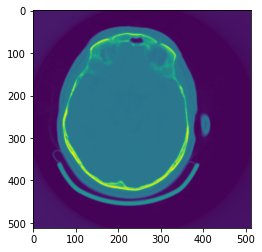

In [29]:
test_list = os.listdir("/Users/brookskennedy/Desktop/stage_2_train_mini")
for i in range(0,15):
    dataset = pydicom.dcmread("/Users/brookskennedy/Desktop/stage_2_train_mini/"+test_list[30], force = True)
    dataset.pixel_array.shape
    plt.imshow(  dataset.pixel_array)
#generated_image.shape

In [ ]:
data_mini